---
title: "Iris Classification"
navtitle: "Iris Classification (NB)"
subtitle: "Introducation to Classification"
description: "Overview of conducting classification analyses for ML."
format:
  html:
    page-layout: full
    title-block-banner: true
---

The [Iris Flower Data Set](https://en.wikipedia.org/wiki/Iris_flower_data_set) is well documented and commonly used for introducing multivariate classification. 

Notebook goals:

- Complete classification analysis with train-test split and two models for comparison
- Data investigation of summary statistics and visualizations
- Metric evaluation and performance visualization

##### Imports

In [1]:
#| include: false
# Global plot settings (hidden from learners)

import plotly.io as pio
from mypyutils import load_json

custom_template = load_json("../tools/json/plotly_template.json")

pio.renderers.default = "png"  # static images, faster rendering
pio.templates["custom_clean"] = custom_template
pio.templates.default = "custom_clean"

Loading json from: ../tools/json/plotly_template.json


In [2]:
# Data management and data visualization
import pandas as pd
import seaborn as sns
import plotly.express as px
from skimpy import skim

In [3]:
# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Metrics for classification analysis
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
)

## Data

### Get the Data

- Import the data from seaborn
- Basic data overview

In [5]:
df = sns.load_dataset("iris")

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.shape

(150, 5)

In [9]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [10]:
# Create list of feature columns
feature_cols = [
    'sepal_length', 
    'sepal_width', 
    'petal_length', 
    'petal_width'
]

## EDA

Descriptive summary and statistics and data visualization offer insight into patterns and relationships.

EDA methods change based on data, goals, and analysis.

This tutorial focus on:

- Summary statistics
- Continuous variables as:
  - Single variables (univariate)
    - Boxplots
    - Violin plots
  - Multiple variables (multivariate)
    - Grouped barplots
    - Scatterplots

### Summary Statistics

- pandas df builtins:
  - [info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)
    - Number or rows and columns
    - Info on missing values
    - Datatype of each column
  - [describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html):
    - Measures of central tendency for numeric columns
- [skimpy](https://pypi.org/project/skimpy) skim:
  - More comprehensive and visually appealing summary information 

In [11]:
# Built-in pandas function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 150    │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column            ┃ NA   ┃ NA %   ┃ mean     ┃ sd        ┃ p0    ┃ p25   ┃ p50    ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ sepal_length      │    0 │      0 │    5.843 │    0.8281 │   4.3 │   5.1 │    5.8 │  6.4 │   7.9 │ ▃██▇▅▂  │  │
│ │ sepal_width       │    0 │      0 │    3.057 │    0.4359 │     2 │   2.8 │      3 │  3.3 │   4.4 │ ▁▇█▇▂▁  │  │
│ │ petal_length      │    0 │      0 │    3.758 │     1.765 │     1 │   1.6 │   4.35 │  5.1 │   6.9 │ █ ▂▇▆▂  │  │
│ │ petal_width       │    0 │      0 │    1.199 │    0.7622 │   0.1 │   0.3 │    1.3 │  1.8 │   2.5 │ █ ▂▆▄▄  │  │
│ └───────────────────┴──────┴────────┴──────────┴───────────┴───────┴───────┴────────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃         ┃    ┃      ┃          ┃            ┃        ┃           ┃ chars per   ┃ words per   ┃             ┃  │
│ ┃ column  ┃ NA ┃ NA % ┃ shortest ┃ longest    ┃ min    ┃ max       ┃ row         ┃ row         ┃ total words ┃  │
│ ┡━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ species │  0 │    0 │ setosa   │ versicolor │ setosa │ virginica │        8.33 │           1 │         150 │  │
│ └─────────┴────┴──────┴──────────┴────────────┴────────┴───────────┴─────────────┴─────────────┴─────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Data Transformation & Aggregation
Data can be visualized in many ways and must often be transformed for it.

Our EDA requires two new dfs:
- Grouped/aggregated data with means of our numerical data based on species category
- Long form data for creating facet visuals in the same figure

In [14]:
grouped_df=df.groupby('species', as_index=False)[feature_cols].mean()
grouped_df

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [15]:
print(f'Type of grouped_df: {type(grouped_df)}')
print(f'Shape of grouped_df: {grouped_df.shape}')

Type of grouped_df: <class 'pandas.core.frame.DataFrame'>
Shape of grouped_df: (3, 5)


In [16]:
long_df = df.melt(id_vars='species', value_vars=feature_cols)
long_df.head()

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


In [17]:
print(f'Type of long_df: {type(long_df)}')
print(f'Shape of long_df: {long_df.shape}')

Type of long_df: <class 'pandas.core.frame.DataFrame'>
Shape of long_df: (600, 3)


#### Long DF Subsets

We'll plot petal and sepal features separately.

These subset dfs will be used for that.

In [18]:
long_df.head()

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


In [19]:
long_df.shape

(600, 3)

In [20]:
long_df['variable'].unique()

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [21]:
sepal_features = ['sepal_length', 'sepal_width']
petal_features = ['petal_length', 'petal_width']

In [22]:
sepal_df = long_df[long_df['variable'].isin(sepal_features)]
sepal_df.shape

(300, 3)

In [23]:
petal_df = long_df[long_df['variable'].isin(petal_features)]
petal_df.shape

(300, 3)

In [24]:
print(sepal_df['variable'].unique())
print(petal_df['variable'].unique())

['sepal_length' 'sepal_width']
['petal_length' 'petal_width']


### Visualizations

Data will be examined by species using several approaches.

All visualizations here offer extensive customization including:

- Renaming titles, axes, and subplots
- Color and opacity controls
- Changing font size
- Customizing or removing legend
- Saving figures and more
Limited customization is used here for simplicity's sake.

Note: Plotly visuals are interative and hovering provides more detail. 

#### Barplots
The grouped bar plot below shows the mean for each of the 4 features based on species.

- Petal width is shortest feature in all species
- Setosa shows a distinct pattern from the other two where sepal width>petal length

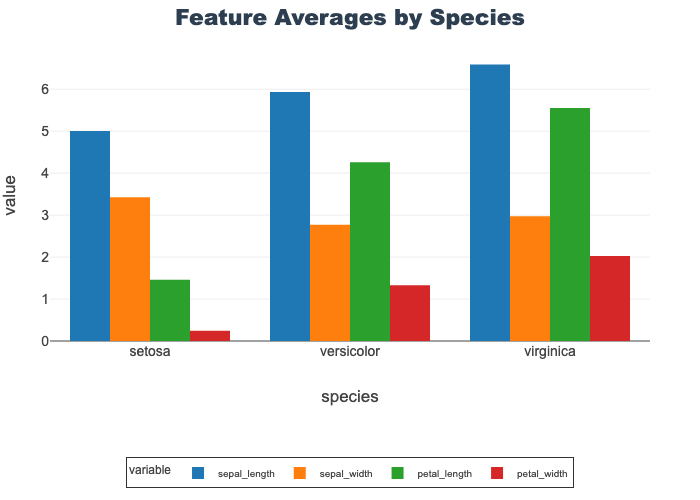

In [25]:
px.bar(grouped_df, x="species", y=feature_cols, 
             barmode="group", title="Feature Averages by Species")

#### Boxplots
Boxplots are helpful in showing distributions and identifying outliers.

See Data Visualization notebook for more details. 

**Sepal Length by Species**

- Compares all species on a single feature, sepal length
- The middle line of each represents the me
- Virginica shows a single, low outlier

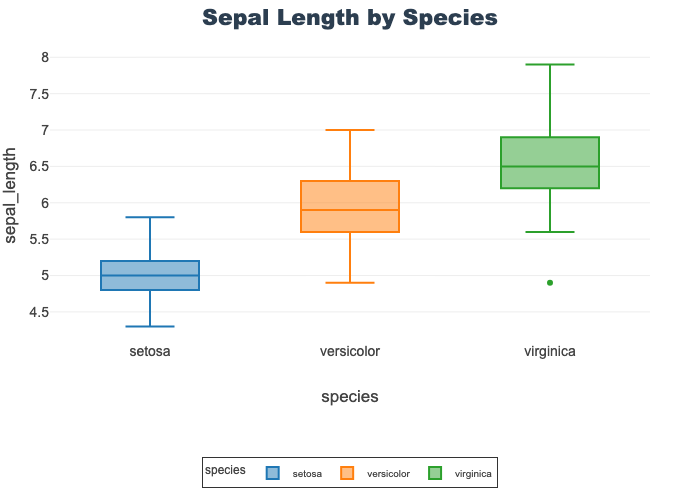

In [26]:
px.box(df, x="species", y="sepal_length",
             title="Sepal Length by Species", color="species")

**Sepal Features by Species**

- Provides length and width boxplots on a shared y-axis
  - Using a shared axis facilitates comparison of the features
- Length is overall longer (in cm) than width
- **Note**: sepal length is identical to the above

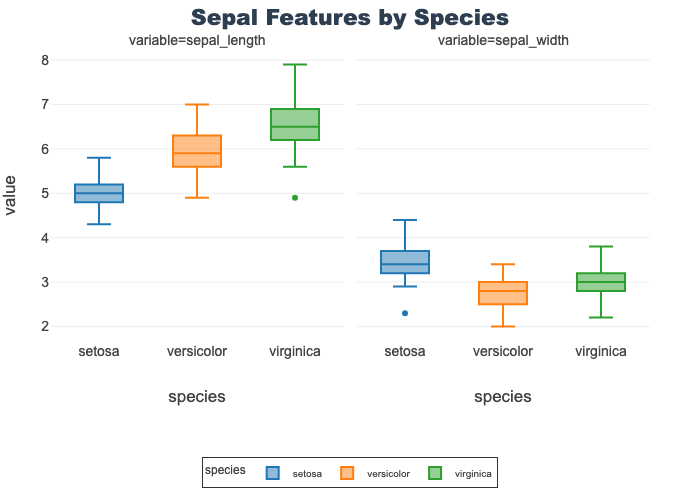

In [27]:
px.box(sepal_df, x="species", y="value", 
             facet_col="variable", title="Sepal Features by Species",
             color="species")

**Petal Features by Species**

- Provides length and width boxplots on a shared y-axis
  - Using a shared axis facilitates comparison of the features
- Length is overall longer (in cm) than width by species
  - However, setosa petal length is lower than virginica petal width

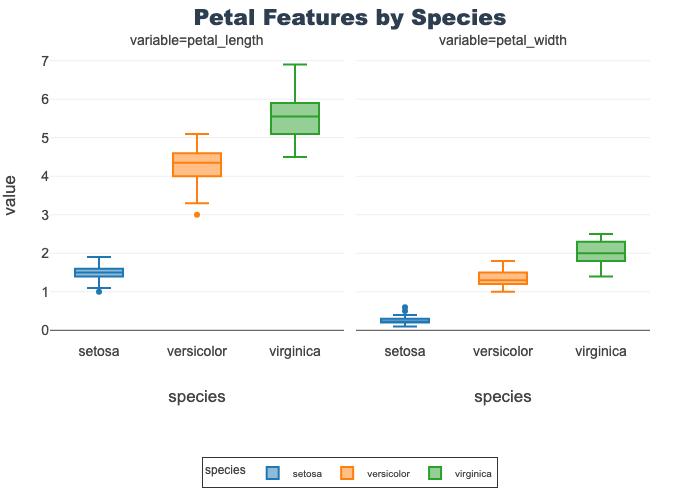

In [28]:
px.box(petal_df, x="species", y="value", 
             facet_col="variable", title="Petal Features by Species",
             color="species")

#### Violin Plots
Violons are also helpful in showing distributions and identifying outliers.

A key distinction between boxplots and violins is the ability to see the distribution pattern.

See Data Visualization notebook for more details. 

**Sepal Length by Species**

- Compares all species on a single feature, sepal length
- Each species shows a unique density
- Setosa is noticable wider and flatter compared to the other two
- Virginica shows a single, low outlier

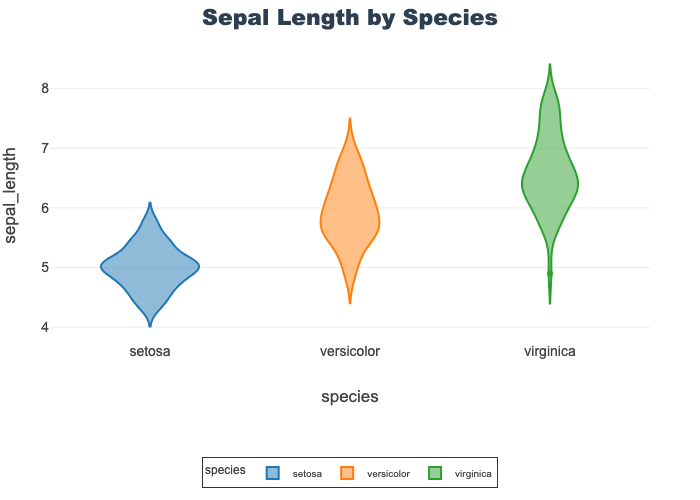

In [29]:
px.violin(df, x="species", y="sepal_length", 
            color="species", title="Sepal Length by Species")

**Sepal Features by Species**

- Provides a violin for sepal length and width
- Outliers exist in several features
- **Note**: sepal length is identical to the above

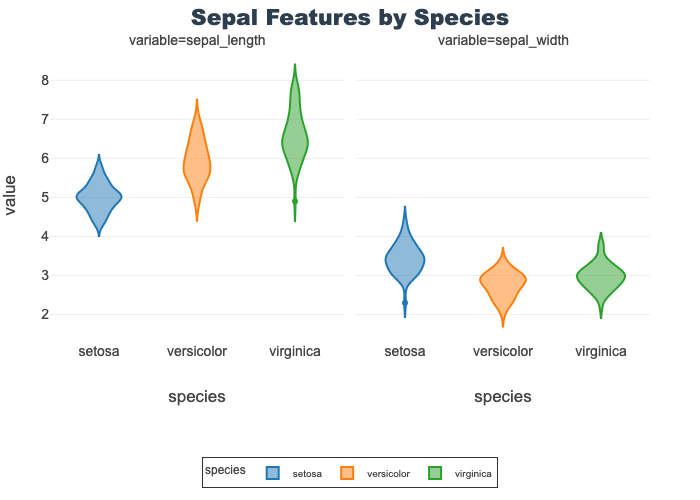

In [30]:
px.violin(sepal_df, x="species", y="value", 
            facet_col="variable", color="species",
            title="Sepal Features by Species")

**Petal Features by Species**

Provides a violin for petal length and width

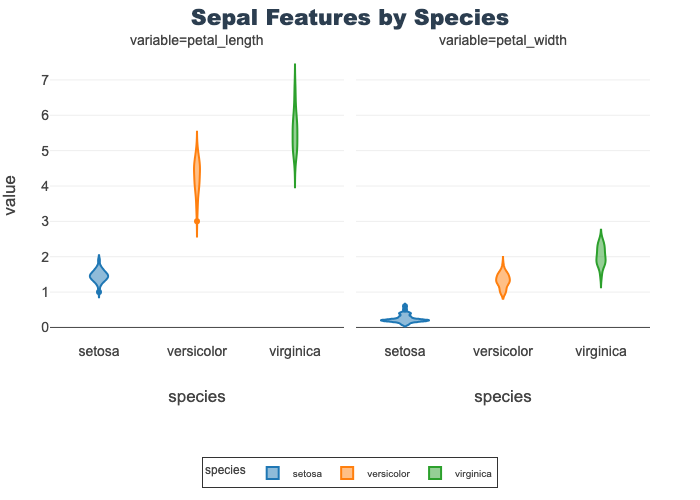

In [31]:
px.violin(petal_df, x="species", y="value", 
            facet_col="variable", color="species",
            title="Sepal Features by Species")

#### Scatter Plots
Help visualize 2-D relationships.

Used here to show petal length-width and sepal length-width by species.

Opacity is set to better visualize overlapping datapoints. 

See Data Visualization notebook for more details. 

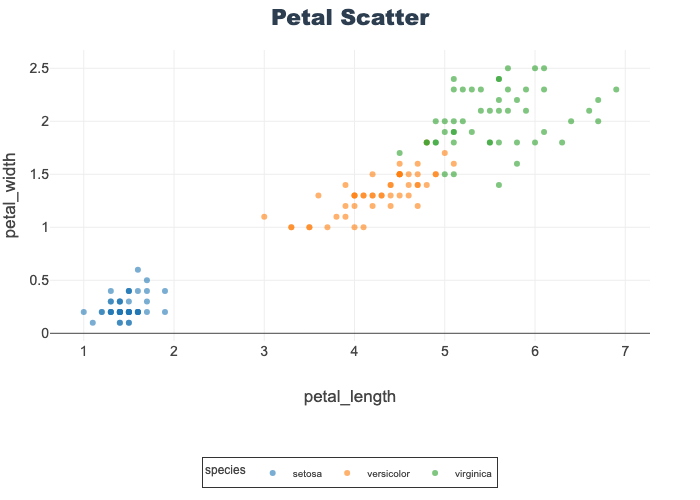

In [32]:
px.scatter(df, x="petal_length", y="petal_width", 
                 color="species", opacity=0.6, title="Petal Scatter")

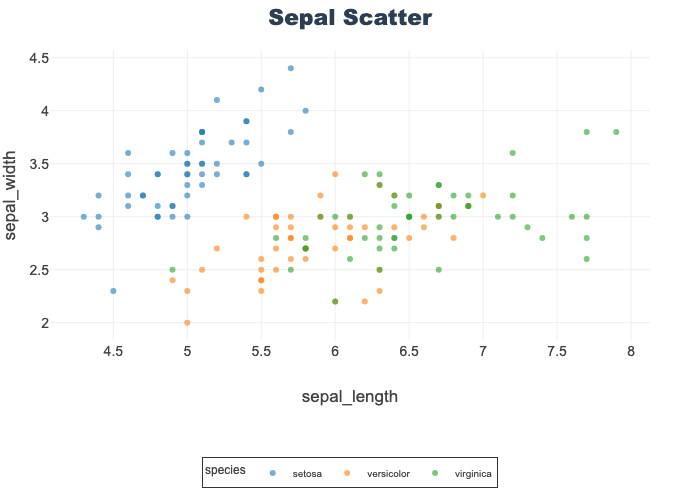

In [33]:
px.scatter(df, x="sepal_length", y="sepal_width", 
                 color="species", opacity=0.6, title="Sepal Scatter")

## Train-Test Split

Best practice is to train models only on training data to avoid data leakage. Failure to do so can result in overfit models and less-generalizable results. Beware of model evaluation metrics that do not use a test data set.

<div class="custom-callout crash-report">
  <div class="callout-header">Crash Report: Why `X` and `y`?</div>
  <p>
    In machine learning, <code>X</code> and <code>y</code> follow a math convention:
  </p>
  <ul>
    <li><strong>X (uppercase)</strong>: The feature <em>matrix</em> — multiple rows (samples) and columns (features).</li>
    <li><strong>y (lowercase)</strong>: The target <em>vector</em> — one value per sample.</li>
  </ul>
  <p>Think of it like this:</p>
  <pre><code>
X = [ [f11, f12, f13],
      [f21, f22, f23],
      [f31, f32, f33] ]  # features matrix

y = [ y1, y2, y3 ]       # target vector
  </code></pre>
  <p>
    <strong>Rule of Thumb:</strong> X is big because it holds all your inputs. y is small because it's just the outputs.
  </p>
</div>


In [34]:
y = df['species']
X = df[feature_cols]

In [35]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [37]:
# Ensure matching row dimensions
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (150, 4)
y shape: (150,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                test_size=0.33, random_state=42, stratify=y)

## Model Training

Using sklearn models that follow an instantiate, fit, predict pattern.

- **Instantiate**: Select model with preferred parameters
- **Fit**: Trains the models on training data
- **Predicts**: Apply model on previously unseen data for evaluation and predictions

**Note**: Many algorithms and models use random states/seeds. Setting this value ensures consistent results which is useful for teaching and direct replication.

### Model Instantiation

Using "out-of-the-box" sklearn models with little to specify.

Will set max_iter=1000 instead of default 100 to increase performance since we are using a small dataset.


In [39]:
lr = LogisticRegression(max_iter=1000, random_state=42)

In [40]:
rf = RandomForestClassifier(random_state=42)

### Model Training

Simply call fit on our models and give our X features, and y target.

NOTE: models are fit 'in-place' so no new variable assignment is needed.

In [41]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [42]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Model Predict

Call predict, on the now fit models, with a new set of feature data and get back predictions.

Save the predications to new variables for evaluation below.

NOTE: We will evaluation both **training** and **testing** performance.

In [43]:
lr_train_preds = lr.predict(X_train)
lr_test_preds = lr.predict(X_test)

In [44]:
lr_test_preds

array(['versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'virginica', 'setosa', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica'], dtype=object)

In [45]:
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)

In [46]:
rf_test_preds

array(['versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'virginica', 'setosa', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica'], dtype=object)

## Model Evaluation

Many evalutation metrics exists and appropriate choices depend on usage.

**Accuracy** will be the focus here, but other metrics explored as well.

Confusion matrices are used to visualize results.

<div class="custom-callout crash-report">
  <div class="callout-header">Crash Report: Which Metrics Matter?</div>
  <p>
    Always report model performance on <strong>unseen test data</strong>. 
    Training metrics are only useful for diagnosing overfitting or underfitting during learning.
    Never tune your model on the test set!
  </p>
</div>

#### Accuracy Scores

Accuracy = (Number of Correct Predictions) / (Total Number of Samples)

Useful classification metric with balanced datasets.

Insights:

- Train accuracy is higher than test for both models (expected)
- Test accuracy is worse for rf than lr despite rf having 100% training accuracy
- Implies potential overfitting by the rf model

In [47]:
lr_train_acc = accuracy_score(y_train, lr_train_preds)
lr_test_acc =  accuracy_score(y_test, lr_test_preds)
print(f'Logistic Regression Train Accuracy Score: {lr_train_acc: .2f} ')
print(f'Logistic Regression Test Accuracy Score: {lr_test_acc: .2f} ')
print(f'\n')

rf_train_acc = accuracy_score(y_train, rf_train_preds)
rf_test_acc =  accuracy_score(y_test, rf_test_preds)
print(f'Random Forest Train Accuracy Score: {rf_train_acc: .2f} ')
print(f'Random Forest Test Accuracy Score: {rf_test_acc: .2f} ')

Logistic Regression Train Accuracy Score:  0.97 
Logistic Regression Test Accuracy Score:  0.94 


Random Forest Train Accuracy Score:  1.00 
Random Forest Test Accuracy Score:  0.90 


#### Classification Reports

In addition to accuracy, reports precision, recall, f-1 score, and support.
Additionally, includes metrics for each class and overall model.

See Classification Metrics notebook for more details.

Insights: 

- Train performance is higher than test for both models on all metrics
- Setosa (class 0) was the most easily identified (see EDA above to guess why)
- Report syntax is identical for each evalution-only change is pairing the correct true and predicted values

##### Logistic Regression Train Classification Report

In [48]:
print(classification_report(y_train, lr_train_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       0.97      0.94      0.95        33
   virginica       0.94      0.97      0.96        33

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



##### Logistic Regression Test Classification Report

In [49]:
print(classification_report(y_test, lr_test_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.89      0.94      0.91        17
   virginica       0.94      0.88      0.91        17

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



##### Random Forest Train Classification Report

In [50]:
print(classification_report(y_train, rf_train_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       1.00      1.00      1.00        33
   virginica       1.00      1.00      1.00        33

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



##### Random Forest Test Classification Report

In [51]:
print(classification_report(y_test, rf_test_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.80      0.94      0.86        17
   virginica       0.93      0.76      0.84        17

    accuracy                           0.90        50
   macro avg       0.91      0.90      0.90        50
weighted avg       0.91      0.90      0.90        50



#### Confusion Matrix

A visualization of classification model performance.

The y-axis if true label, the x-axis is predicted.
So the diagonal represents correct predictions.
It is a great approach to understanding which classes are being confused and how.

Insights: 

- Train performance is higher than test for both models on all metrics
- Setosa was the most easily identified (see EDA above to figure out why)
- Report syntax is identical for each evalution-only change is pairing the correct true and predicted values

##### Logistic Regression Train Confusion Matrix

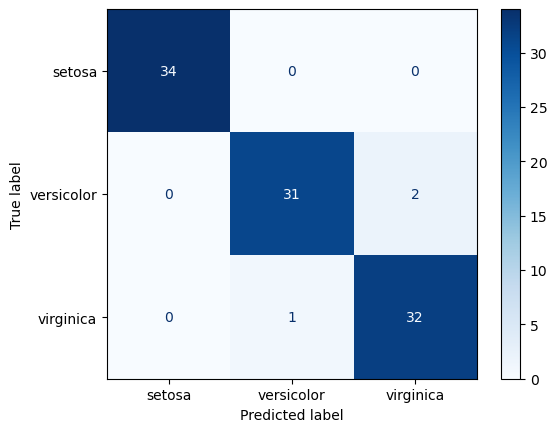

In [52]:
ConfusionMatrixDisplay.from_predictions(
    y_true=y_train, y_pred=lr_train_preds, cmap='Blues')

##### Logistic Regression Test Confusion Matrix

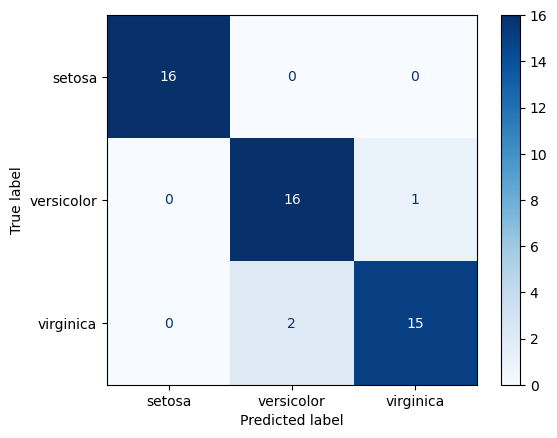

In [53]:
ConfusionMatrixDisplay.from_predictions(
    y_true=y_test, y_pred=lr_test_preds, cmap='Blues')

##### Random Forest Train Confusion Matrix

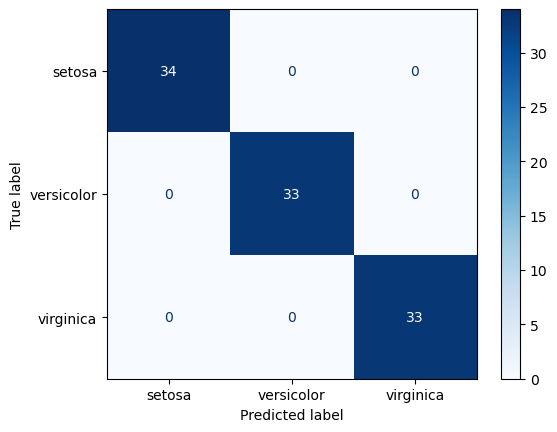

In [54]:
ConfusionMatrixDisplay.from_predictions(
    y_true=y_train, y_pred=rf_train_preds, cmap='Blues')

##### Random Forest Test Confusion Matrix

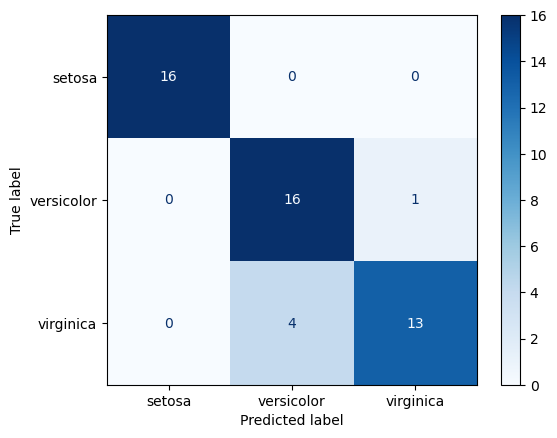

In [55]:
ConfusionMatrixDisplay.from_predictions(
    y_true=y_test, y_pred=rf_test_preds, cmap='Blues')

# Iris Classification Review

Notebook goals:

- Complete classification analysis with train-test split and two models for comparison
  - Trained and predicted with a logistic regression and random forest model
  - Generated train-test split and predictions from both data sets
- Data investigation of summary statistics and visualizations
  - Data summary info based on skimpy, pandas info and describe
  - Created both aggregated and long form data for visuals
  - EDA included barplots, boxplots, violins, and scatters
- Metric evaluation and performance visulization
  - Initial evaluation based on accuracy scores
  - Additional metrics from classification report
  - Confusion matrices to visual performance
  - **Bonus**: Identified potential overfitting in the rf model